In [ ]:
! pip install pandas
! pip install scikit-learn 
! pip install tensorflow
! pip install matplotlib seaborn 
! pip install imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [54]:
import pandas as pd

# Load datasets
orders = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\orders.csv")
order_prior = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\order_products__prior.csv")
order_train = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\order_products__train.csv")
products = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\products.csv")
aisles = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\aisles.csv")
departments = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\departments.csv")

In [55]:
print(f"\nColumns:")
print(orders.columns.tolist())
print(order_prior.columns.tolist())
print(order_prior.columns.tolist())
print(products.columns.tolist())
print(aisles.columns.tolist())
print(departments.columns.tolist())


Columns:
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['product_id', 'product_name', 'aisle_id', 'department_id']
['aisle_id', 'aisle']
['department_id', 'department']


In [6]:
print(order_prior.shape)
print(aisles.shape)
print(departments.shape)
print(products.shape)
print(orders.shape)
print(order_train.shape)

(32434489, 4)
(134, 2)
(21, 2)
(49688, 4)
(3421083, 7)
(1384617, 4)


In [57]:
print(order_prior.dtypes)
print(aisles.dtypes)
print(departments.dtypes)
print(products.dtypes)
print(orders.dtypes)
print(order_train.dtypes)

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object
aisle_id     int64
aisle       object
dtype: object
department_id     int64
department       object
dtype: object
product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object
order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object
order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object


In [ ]:
import pandas as pd

# Load datasets
orders = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\orders.csv")
order_prior = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\order_products__prior.csv")
order_train = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\order_products__train.csv")
products = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\products.csv")
aisles = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\aisles.csv")
departments = pd.read_csv(r"C:\Users\mythi\Downloads\archive (21)\departments.csv")

In [ ]:
print(order_prior.shape)
print(aisles.shape)
print(departments.shape)
print(products.shape)
print(orders.shape)
print(order_train.shape)

(32434489, 4)
(134, 2)
(21, 2)
(49688, 4)
(3421083, 7)
(1384617, 4)


In [16]:
import pandas as pd

chunk_size = 1_000_000  
chunks = []

# Convert categorical columns once
aisles['aisle_id'] = aisles['aisle_id'].astype('category')
departments['department_id'] = departments['department_id'].astype('category')
products['product_id'] = products['product_id'].astype('category')
products['aisle_id'] = products['aisle_id'].astype('category')
products['department_id'] = products['department_id'].astype('category')
if 'order_id' not in orders.columns:
    orders = orders.reset_index()
orders['order_id'] = orders['order_id'].astype('category')
orders['user_id'] = orders['user_id'].astype('category')
orders = orders.sort_values('order_id').set_index('order_id')

order_prior['order_id'] = order_prior['order_id'].astype('category')
order_prior['product_id'] = order_prior['product_id'].astype('category')

for start in range(0, len(order_prior), chunk_size):
    chunk = order_prior.iloc[start:start+chunk_size].copy()

    # Set index on order_id for merging
    chunk['order_id'] = chunk['order_id'].astype('category')
    chunk['product_id'] = chunk['product_id'].astype('category')
    chunk = chunk.sort_values('order_id').set_index('order_id')

    # Merge with orders
    chunk = chunk.merge(orders, left_index=True, right_index=True, how='left', validate='many_to_one').reset_index()

    # Merge with products
    chunk = pd.merge(chunk, products, on='product_id', how='left', validate='many_to_one')

    # Merge with aisles
    chunk = pd.merge(chunk, aisles, on='aisle_id', how='left', validate='many_to_one')

    # Merge with departments
    chunk = pd.merge(chunk, departments, on='department_id', how='left', validate='many_to_one')

    chunks.append(chunk)

# Concatenate all chunks with reset index
merged_prior = pd.concat(chunks, ignore_index=True)

print(merged_prior.shape)
merged_prior.to_csv("prior_data.csv", index=False)
print("Saved prior data.")


(32434489, 15)
Saved prior data.


In [14]:
import pandas as pd

chunk_size = 500_000
chunks = []

# Convert aisles and departments to categorical once
aisles['aisle_id'] = aisles['aisle_id'].astype('category')
departments['department_id'] = departments['department_id'].astype('category')
products['product_id'] = products['product_id'].astype('category')
products['aisle_id'] = products['aisle_id'].astype('category')
products['department_id'] = products['department_id'].astype('category')

if 'order_id' not in orders.columns:
    orders = orders.reset_index()
orders['order_id'] = orders['order_id'].astype('category')
orders['user_id'] = orders['user_id'].astype('category')
orders = orders.sort_values('order_id').set_index('order_id')  

for start in range(0, len(order_train), chunk_size):
    chunk = order_train.iloc[start:start+chunk_size].copy()

    # Convert keys in chunk
    chunk['order_id'] = chunk['order_id'].astype('category')
    chunk['product_id'] = chunk['product_id'].astype('category')

    # Merge chunk with orders
    chunk = pd.merge(chunk, orders, left_index=True, right_index=True, how='left').reset_index()

    # Merge with products
    chunk = pd.merge(chunk, products, on='product_id', how='left')

    # Merge with aisles
    chunk = pd.merge(chunk, aisles, on='aisle_id', how='left')

    # Merge with departments
    chunk = pd.merge(chunk, departments, on='department_id', how='left')

    chunks.append(chunk)

# Combine all chunks
merged_train = pd.concat(chunks)

print(merged_train.shape)
merged_train.to_csv("train_labels.csv", index=False)
print("Saved train labels.")


(1384617, 16)
Saved train labels.


In [1]:
import pandas as pd
import os

DATA_PATH = r"C:\Users\mythi\prior_data.csv"
OUTPUT_PATH = r"C:\Users\mythi\final_features.csv"
CHUNK_SIZE = 20000

def aggregate_user_features(prior):
    user_group = prior.groupby('user_id')
    user_feats = user_group.agg({
        'order_number': 'max',
        'days_since_prior_order': 'mean',
        'product_id': ['count', 'nunique'],
        'reordered': 'mean'
    }).reset_index()
    user_feats.columns = [
        'user_id', 'total_orders', 'avg_days_between_orders',
        'total_products_ordered', 'total_unique_products_ordered', 'user_reorder_ratio'
    ]

    user_avg_order_value = (
        user_group['product_id'].count() / user_group['order_id'].nunique()
    ).reset_index(name='user_avg_order_value')

    return user_feats.merge(user_avg_order_value, on='user_id')

def aggregate_product_features(prior):
    product_group = prior.groupby('product_id')
    product_feats = product_group.agg({
        'order_id': 'count',
        'reordered': 'mean',
        'add_to_cart_order': 'mean'
    }).reset_index()
    product_feats.columns = [
        'product_id', 'total_times_ordered', 'reorder_rate', 'avg_add_to_cart_order'
    ]

    product_avg_days = product_group['days_since_prior_order'].mean().reset_index(name='product_avg_days_between_orders')
    product_user_count = product_group['user_id'].nunique().reset_index(name='product_user_count')

    product_gap = prior.groupby('product_id')['order_number'].agg(['min', 'max']).reset_index()
    product_gap['product_first_last_order_gap'] = product_gap['max'] - product_gap['min']
    product_gap = product_gap[['product_id', 'product_first_last_order_gap']]

    return product_feats \
        .merge(product_avg_days, on='product_id') \
        .merge(product_user_count, on='product_id') \
        .merge(product_gap, on='product_id')

def aggregate_user_product_features(prior):
    user_product = prior.groupby(['user_id', 'product_id']).agg({
        'order_id': 'count',
        'order_number': 'max',
        'reordered': 'sum'
    }).reset_index()
    user_product.columns = [
        'user_id', 'product_id', 'times_user_ordered_product',
        'last_order_number', 'times_reordered_by_user'
    ]

    last_user_order = prior.groupby('user_id')['order_number'].max().reset_index()
    last_user_order.columns = ['user_id', 'user_last_order']

    user_product = user_product.merge(last_user_order, on='user_id', how='left')
    user_product['days_since_last_reorder'] = user_product['user_last_order'] - user_product['last_order_number']

    user_product['user_product_reorder_ratio'] = (
        user_product['times_reordered_by_user'] / user_product['times_user_ordered_product']
    ).fillna(0)

    return user_product

def process_data_in_chunks():
    user_chunks = []
    product_chunks = []
    user_product_chunks = []

    for chunk in pd.read_csv(
        DATA_PATH,
        chunksize=CHUNK_SIZE,
        low_memory=True,
        on_bad_lines='warn',
        dtype={
            'user_id': 'int64',
            'order_number': 'int16',
            'days_since_prior_order': 'float32',
            'product_id': 'int64',
            'reordered': 'int8',
            'order_id': 'int64',
            'add_to_cart_order': 'int16'
        }
    ):
        user_chunks.append(chunk[['user_id', 'order_number', 'days_since_prior_order', 'product_id', 'reordered', 'order_id']])
        product_chunks.append(chunk[['product_id', 'order_id', 'reordered', 'add_to_cart_order', 'days_since_prior_order', 'user_id', 'order_number']])
        user_product_chunks.append(chunk[['user_id', 'product_id', 'order_id', 'order_number', 'reordered']])

    prior_users = pd.concat(user_chunks)
    prior_products = pd.concat(product_chunks)
    prior_user_products = pd.concat(user_product_chunks)

    final_user_features = aggregate_user_features(prior_users)
    final_product_features = aggregate_product_features(prior_products)
    user_product_features = aggregate_user_product_features(prior_user_products)

    return final_user_features, final_product_features, user_product_features

def merge_and_save(final_user_features, final_product_features, user_product_features):
    if os.path.exists(OUTPUT_PATH):
        os.remove(OUTPUT_PATH)

    total_rows = user_product_features.shape[0]

    for start in range(0, total_rows, CHUNK_SIZE):
        end = min(start + CHUNK_SIZE, total_rows)
        chunk = user_product_features.iloc[start:end].copy()

        chunk = chunk.merge(final_user_features, on='user_id', how='left')
        chunk = chunk.merge(final_product_features, on='product_id', how='left')

        # Derived features
        chunk['user_product_order_rate'] = chunk['times_user_ordered_product'] / chunk['total_orders']
        chunk['user_reorder_frequency'] = chunk['user_reorder_ratio'] * chunk['total_orders']
        chunk['product_reorder_frequency'] = chunk['reorder_rate'] * chunk['product_user_count']

        chunk.to_csv(OUTPUT_PATH, mode='a', header=(start == 0), index=False)

    print("Final features saved to:", OUTPUT_PATH)

def main():
    print("Processing data in chunks")
    final_user_features, final_product_features, user_product_features = process_data_in_chunks()

    print("Merging features and saving to CSV.")
    merge_and_save(final_user_features, final_product_features, user_product_features)

if __name__ == "__main__":
    main()

Processing data in chunks
Merging features and saving to CSV.
Final features saved to: C:\Users\mythi\final_features.csv


In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Paths
features_path = r"C:\Users\mythi\final_features.csv"
labels_path = r"C:\Users\mythi\train_labels.csv"

# Load labels in chunks and concatenate
label_chunks = []
for i, chunk in enumerate(pd.read_csv(
    labels_path,
    chunksize=500000,
    usecols=['user_id', 'product_id', 'reordered'],
    dtype={'user_id': 'Int32', 'product_id': 'Int32', 'reordered': 'float32'}
)):
    chunk['reordered'] = chunk['reordered'].fillna(0).astype('int8')
    label_chunks.append(chunk)

train_labels = pd.concat(label_chunks, ignore_index=True)
print("Completed loading labels.")

# Load features in chunks and merge with labels
merged_chunks = []
features_iter = pd.read_csv(features_path, chunksize=500000, low_memory=False, iterator=True)

for i, chunk in enumerate(features_iter):
    # Merge with labels
    chunk = chunk.merge(train_labels, on=['user_id', 'product_id'], how='left')
    chunk['reordered'] = chunk['reordered'].fillna(0).astype('int8')
    merged_chunks.append(chunk)

features = pd.concat(merged_chunks, ignore_index=True)
print("Completed merging all feature chunks.")

# List of categorical columns for filling missing values and encoding
categorical_cols = [
    'product_name', 'aisle', 'department',
    'user_order_dow_mode', 'user_order_hour_mode',
    'product_dow_mode', 'product_order_hour_mode'
]

# List of numerical columns for filling missing values and scaling
numerical_columns = [
    'times_user_ordered_product', 'last_order_number', 'times_reordered_by_user',
    'total_orders', 'avg_days_between_orders', 'total_products_ordered',
    'user_reorder_ratio', 'total_unique_products_ordered', 'user_avg_order_value',
    'total_times_ordered', 'reorder_rate', 'avg_add_to_cart_order',
    'product_avg_days_between_orders', 'product_user_count', 'product_first_last_order_gap',
    'user_product_order_rate', 'user_reorder_frequency', 'product_reorder_frequency',
    'days_since_last_reorder'
]

# Fill missing values for categorical features with mode
for col in categorical_cols:
    if col in features.columns:
        mode_val = features[col].mode()[0]
        features[col] = features[col].fillna(mode_val)

# Fill missing values for numerical features with median
for col in numerical_columns:
    if col in features.columns:
        median_val = features[col].median()
        features[col] = features[col].fillna(median_val)

# Check for any remaining missing values
print("Missing values after filling:")
print(features.isnull().sum())

# Encode categorical columns for embedding 
embedding_cols = ['user_id', 'product_id', 'aisle', 'department','eval_set']
for col in embedding_cols:
    if col in features.columns:
        features[col] = pd.Categorical(features[col]).codes.astype('int32')
        

# Label encode other categorical columns
other_categorical = [
    'product_name', 'user_order_dow_mode', 'user_order_hour_mode',
    'product_dow_mode', 'product_order_hour_mode'
]

label_encoders = {}
for col in other_categorical:
    if col in features.columns:
        le = LabelEncoder()
        features[col] = le.fit_transform(features[col].astype(str))
        label_encoders[col] = le

# Scale numerical features
scaler = StandardScaler()
existing_num_cols = [col for col in numerical_columns if col in features.columns]
features[existing_num_cols] = scaler.fit_transform(features[existing_num_cols])

output_path = r"C:\Users\mythi\preprocessed_features.csv"
features.to_csv(output_path, index=False)
print(f"Preprocessed data saved to {output_path}")


Completed loading labels.
Completed merging all feature chunks.
Missing values after filling:
user_id                            0
product_id                         0
times_user_ordered_product         0
last_order_number                  0
times_reordered_by_user            0
user_last_order                    0
days_since_last_reorder            0
user_product_reorder_ratio         0
total_orders                       0
avg_days_between_orders            0
total_products_ordered             0
total_unique_products_ordered      0
user_reorder_ratio                 0
user_avg_order_value               0
total_times_ordered                0
reorder_rate                       0
avg_add_to_cart_order              0
product_avg_days_between_orders    0
product_user_count                 0
product_first_last_order_gap       0
user_product_order_rate            0
user_reorder_frequency             0
product_reorder_frequency          0
reordered                          0
dtype: int64
Prepr

In [4]:
import pandas as pd 
features = pd.read_csv("C:/Users/mythi/preprocessed_features.csv")
print(features['reordered'].value_counts())

reordered
0    13247149
1       63792
Name: count, dtype: int64


Epoch 1/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5805 - loss: 0.7175 - val_accuracy: 0.0000e+00 - val_loss: 0.9304 - learning_rate: 0.0010
Epoch 2/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6252 - loss: 0.6497 - val_accuracy: 0.1480 - val_loss: 1.1787 - learning_rate: 0.0010
Epoch 3/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7050 - loss: 0.5656 - val_accuracy: 0.0151 - val_loss: 1.2383 - learning_rate: 0.0010
Epoch 4/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7350 - loss: 0.5236 - val_accuracy: 0.5078 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 5/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7784 - loss: 0.4689 - val_accuracy: 0.8870 - val_loss: 0.3321 - learning_rate: 0.0010
Epoch 6/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7953 - loss: 0.4432 - val_accuracy: 0.9364 - val_loss: 0.2748 - learning_rate: 0.0010
Epoch 7/10
875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8045 - loss: 0.428

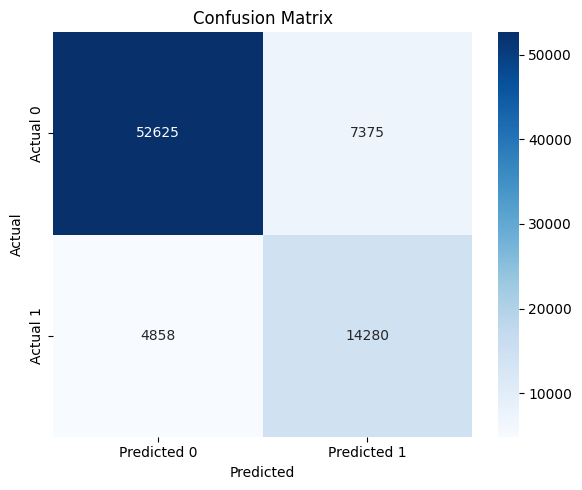

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report, f1_score, roc_auc_score,
    accuracy_score, precision_score, recall_score,
    confusion_matrix
)
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# For reproducibility
np.random.seed(42)
tf.random.set_seed(42)

#  Load and prepare data 
features = pd.read_csv("C:/Users/mythi/preprocessed_features.csv")
X = features.drop(columns=['reordered'])
y = features['reordered']

# Downsample majority class
df_majority_downsampled = features[features.reordered == 0].sample(n=200_000, random_state=42)
df_minority = features[features.reordered == 1]
df_small = pd.concat([df_majority_downsampled, df_minority]).sample(frac=1, random_state=42).reset_index(drop=True)

X_small = df_small.drop(columns=['reordered'])
y_small = df_small['reordered']

#  Train/test split 
X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_small, stratify=y_small, test_size=0.3, random_state=42
)

#  Apply SMOTE 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#  Build FFNN Model 
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

#  Callbacks 
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

#  Train Model 
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_split=0.2,
    epochs=10,
    batch_size=256,
    callbacks=[early_stop, reduce_lr],
    verbose=1
)

#  Predict and Evaluate 
y_probs = model.predict(X_test).ravel()

# Find best threshold for F1
thresholds = np.arange(0.1, 0.9, 0.01)
f1_scores = [f1_score(y_test, (y_probs >= t).astype(int)) for t in thresholds]
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"\nBest Threshold: {best_threshold:.2f}, Best F1 Score: {max(f1_scores):.4f}")

# Predict using best threshold
y_pred = (y_probs >= best_threshold).astype(int)

#  Evaluation Metrics 
accuracy  = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall    = recall_score(y_test, y_pred, zero_division=0)
f1        = f1_score(y_test, y_pred, zero_division=0)
roc_auc   = roc_auc_score(y_test, y_probs)

#  Print Results 
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))
print(f"Accuracy     : {accuracy:.4f}")
print(f"Precision    : {precision:.4f}")
print(f"Recall       : {recall:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"ROC-AUC      : {roc_auc:.4f}")

#  Confusion Matrix Plot 
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

model.save("ffnn_model.h5")
